<a href="https://colab.research.google.com/github/VadimTribrat/RecSys/blob/main/Neuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import rv_discrete
from tqdm import tqdm
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
N = 64
R_on = 25 * 1000
R_off = 250 * 1000
mu_v = 10 ** -14
V_p = 1.5
V_n = -1
D = 20 * 10 ** -9
R_int = 1000
C_int = 45 * 10 ** -6
V_te_plus = 2.5
V_te_minus = -1.6
V_te_zero = 20 * 10 ** -3
V_out_plus = 2
V_th = 10 ** -3
tau_r = 20 * 10 ** -3
tau_s = 10 ** -3
tau_out = 10 * 10 ** -3

In [3]:
x = np.random.uniform(size=N)
V_int = 0
tau = max(tau_r, tau_out) + 10 ** -5
#tau = 0

In [4]:
def V_te():
    global tau
    if tau <= tau_s:
        return V_te_plus
    elif tau_s < tau <= tau_r / 2:
        return 0
    elif tau_r / 2 < tau <= tau_r / 2 + tau_s:
        # print("minus")
        return V_te_minus
    elif tau_r / 2 + tau_s < tau <= tau_r:
        return 0
    elif tau_r < tau:
        return V_te_zero

In [5]:
tau = max(tau_r, tau_out) + 10 ** -5
print(tau_r / 2 ,  tau , tau_r / 2 + tau_s)

0.01 0.02001 0.011


In [6]:
for t in np.arange(0.0, 0.1, 10 ** -5):
    tau = t
    V_te()

In [7]:
def V_out():
    if tau <= tau_out:
        return V_out_plus
    return 0

In [8]:
def F_X(I, v, x):
    if v >= V_p:
        return mu_v * V_p / (D ** 2) * np.exp(R_on / V_p * I)
    elif v <= V_n:
        return mu_v * V_n / (D ** 2) * np.exp(R_on / V_n * I)
    return mu_v * R_on * I / (D ** 2) 

In [9]:
def F_R(x, v):
    return R_on * x + R_off * (1 - x)

In [18]:
def update(dt, v_g):
    Rs = 0
    flag = False
    global V_int, tau
    dV_int = 0
    for i in range(N):
        if v_g[i] > 0:
            R = F_R(x[i], V_te()  - V_int)
            dx = F_X((V_te() - V_int) / R, V_te() - V_int, x[i]) * dt
            if abs(dx) > 1:
                dx = 1 if dx > 0 else -1
            x[i] += dx
            Rs += 1 / R
            dV_int += (max(min(V_te_zero, V_te()), 0) - V_int) / R
    dV_int  = (dV_int - V_int / R_int) / C_int * dt
    if abs(dV_int) > 1:
        flag = True
        dV_int = 0.1 if dx > 0 else -0.1
    V_int += dV_int
    tau = tau + dt
    if V_int >= V_th or flag:
        tau = 0.0
        V_int = 0.0
    #print()
    return V_int, (dV_int - V_int / R_int) / C_int * dt

In [19]:
pattern = np.asarray([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 2, 2, 2, 2, 2, 0],
    [0, 2, 2, 0, 0, 0, 2, 0],
    [0, 2, 0, 2, 0, 0, 2, 0],
    [0, 2, 0, 0, 2, 0, 2, 0],
    [0, 2, 0, 0, 0, 2, 2, 0],
    [0, 2, 2, 2, 2, 2, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
])
pattern[pattern == 2] = 1
pattern = pattern.ravel()

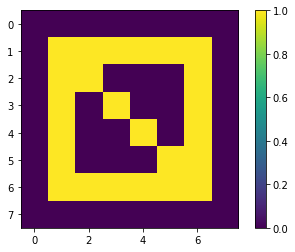

In [20]:
plt.imshow(pattern.reshape(8, -1))
plt.colorbar()

In [21]:
rv = rv_discrete(values=([0, 1], [0.875, 0.125]))
perm = rv_discrete(values=([0, 1], [0.5, 0.5]))

In [22]:
x = np.random.uniform(size=N)
V_int = 0
tau = max(tau_r, tau_out) + 10 ** -5
#tau = 0

In [26]:
stride = 10 ** -3
n_iter = 1000
obj = None

x = np.random.uniform(0.0, 0.1, size=N)
V_int = 0
tau = max(tau_r, tau_out) + 10 ** -5
#tau = 0
fall = None
for i in tqdm(range(500)):
    if perm.rvs():
        obj = pattern
    else:
        obj = rv.rvs(size=64)
    # plt.imshow(obj.reshape(8, 8))
    # plt.show()
    for k in range(n_iter):
        #update(stride / n_iter, obj)
        fall = update(stride / n_iter, obj)
    #print("\n\n")

100%|██████████| 500/500 [01:11<00:00,  7.01it/s]


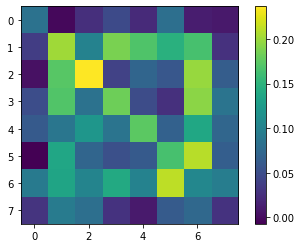

In [27]:
plt.imshow(x.reshape(8, 8))
plt.colorbar()

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:100


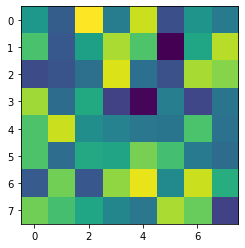

 10%|█         | 1/10 [00:14<02:06, 14.08s/it]

Epoch:300


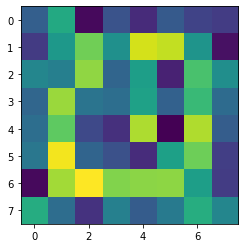

 20%|██        | 2/10 [00:53<03:50, 28.77s/it]

Epoch:500


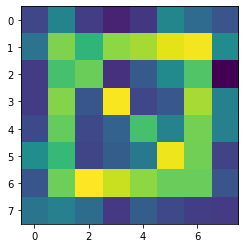

 30%|███       | 3/10 [01:58<05:17, 45.40s/it]

Epoch:700


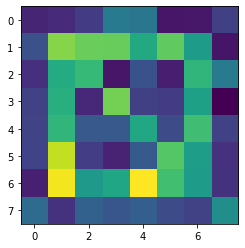

 40%|████      | 4/10 [03:29<06:20, 63.39s/it]

Epoch:900


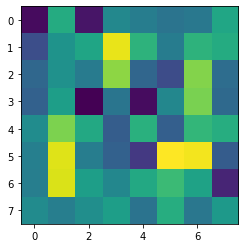

 50%|█████     | 5/10 [05:24<06:49, 81.91s/it]

Epoch:1100


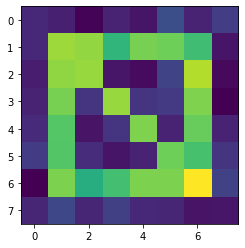

 60%|██████    | 6/10 [07:49<06:54, 103.67s/it]

Epoch:1300


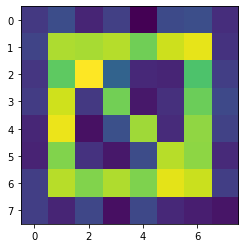

 70%|███████   | 7/10 [10:42<06:18, 126.04s/it]

Epoch:1500


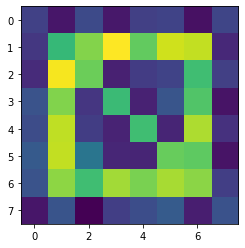

 80%|████████  | 8/10 [13:55<04:55, 147.53s/it]

Epoch:1700


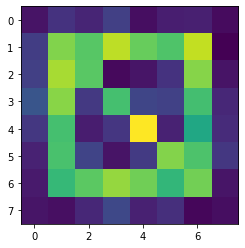

 90%|█████████ | 9/10 [17:38<02:51, 171.15s/it]

Epoch:1900


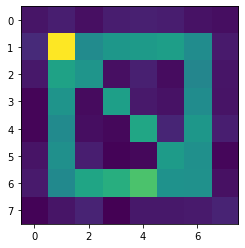

100%|██████████| 10/10 [21:48<00:00, 130.88s/it]


In [29]:
for epoch in tqdm(range(100, 2001, 200)):
    stride = 10 ** -3
    n_iter = 1000
    obj = None

    x = np.random.uniform(0.0, 0.1, size=N)
    V_int = 0
    tau = max(tau_r, tau_out) + 10 ** -5
    #tau = 0
    fall = None
    for i in range(epoch):
        if perm.rvs():
            obj = pattern
        else:
            obj = rv.rvs(size=64)
        # plt.imshow(obj.reshape(8, 8))
        # plt.show()
        for k in range(n_iter):
            #update(stride / n_iter, obj)
            fall = update(stride / n_iter, obj)
        #print("\n\n") 
    print(f"Epoch:{epoch}")
    plt.imshow(x.reshape(8, 8))
    plt.show()